In [2]:
import pandas as pd
import os
import h5py
from ecg import Datasets, EcgSignal    

# 1. Исследовательский анализ данных



## 1.1 Данные: PTBXL 
[Источник](https://physionet.org/content/ptb-xl/1.0.3/)

- ptbxl_data - общий набор данных со ссылками на записи экг
- ptbxl_scp_statements - набор данных с описанием диагнозов

In [3]:
ptbxl_data = pd.read_csv(Datasets.ptbxl.path)
ptbxl_statements = pd.read_csv(Datasets.ptbxl_scp_statements.path)

In [4]:
ptbxl_data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [5]:
ptbxl_statements

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
67,AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
68,SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
69,PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [11]:
print("Всего уникальных состояний здоровья сердца в датасете:", len(ptbxl_statements))

Всего уникальных состояний здоровья сердца в датасете: 71


In [10]:
print("Общие уникальные классы:")
ptbxl_statements['diagnostic_class'].unique()

Общие уникальные классы:


array(['STTC', 'NORM', 'MI', 'HYP', 'CD', nan], dtype=object)

#### Основные классы:
- STTC (ST/T Change - **изменения в ST/T-сегменте**),  5235 записей
- NORM (Normal ECG - **нормальный экг**),  9514 записей
- MI (Myocardial Infarction - **инфаркт миокарда**),  5469 записей
- HYP (Hypertrophy - **гипертрофия**), 2649 записей
- CD (Conduction Disturbance - **нарушение проводимости**),  4898 записей




In [14]:
ptbxl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [15]:
ptbxl_data['scp_codes']

0                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                             {'NORM': 80.0, 'SBRAD': 0.0}
2                               {'NORM': 100.0, 'SR': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21794    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21795             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21796                           {'ISCAS': 50.0, 'SR': 0.0}
21797                           {'NORM': 100.0, 'SR': 0.0}
21798                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21799, dtype: object

In [16]:
ptbxl_data['scp_codes'].nunique()

5463

In [19]:
d = {'NORM': 100.0, 'SR': 0.0}
for k, v in d.items():
    if k == 'NORM' and v > 80:
        print(k, v)

NORM 100.0


In [ ]:
1

## 1.2 Данные: CODE test
[[https://zenodo.org/records/3765780]]


<Figure size 1800x800 with 0 Axes>

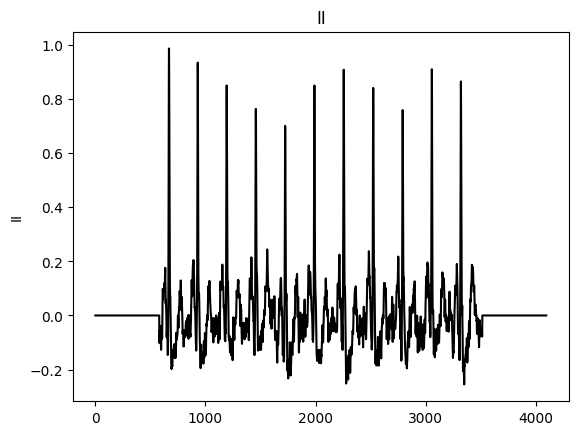

In [13]:
ecg_sample_codetest = EcgSignal.take_sample_codetest(person_idx=2, show=True, zone='II', prep=False)